<a href="https://colab.research.google.com/github/bharaniakella/Ab_torch/blob/main/ann_classify_qwerty.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import torch.nn as nn
from matplotlib import pyplot as plt
import numpy  as np
import torch

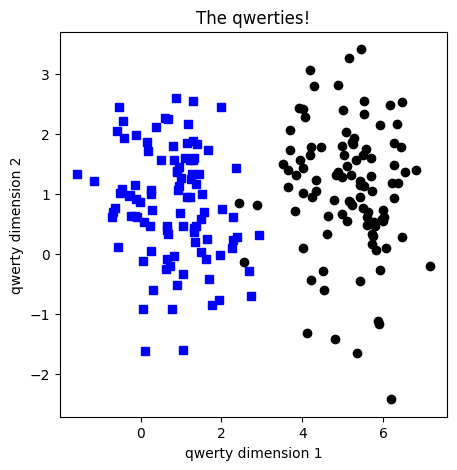

In [4]:
# create data

nPerClust = 100
blur = 1

A = [  1, 1 ]
B = [  5, 1 ]

# generate data
a = [ A[0]+np.random.randn(nPerClust)*blur , A[1]+np.random.randn(nPerClust)*blur ]
b = [ B[0]+np.random.randn(nPerClust)*blur , B[1]+np.random.randn(nPerClust)*blur ]

# true labels
labels_np = np.vstack((np.zeros((nPerClust,1)),np.ones((nPerClust,1))))

# concatanate into a matrix
data_np = np.hstack((a,b)).T

# convert to a pytorch tensor
data = torch.tensor(data_np).float()
labels = torch.tensor(labels_np).float()

# show the data
fig = plt.figure(figsize=(5,5))
plt.plot(data[np.where(labels==0)[0],0],data[np.where(labels==0)[0],1],'bs')
plt.plot(data[np.where(labels==1)[0],0],data[np.where(labels==1)[0],1],'ko')
plt.title('The qwerties!')
plt.xlabel('qwerty dimension 1')
plt.ylabel('qwerty dimension 2')
plt.show()

In [5]:
ann_classify=nn.Sequential(
    nn.Linear(2,1),
    nn.ReLU(),
    nn.Linear(1,1),
    nn.Sigmoid()
)

lr=0.01
loss_fun=nn.BCELoss()
optimizer=torch.optim.SGD(ann_classify.parameters(),lr=lr)

numepochs=500
losses=torch.zeros(numepochs)

for epochi in range(numepochs):
  yhat=ann_classify(data)
  loss=loss_fun(yhat,labels)

  losses[epochi]=loss

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()


final_pred=ann_classify(data)

In [10]:
pred_labels=final_pred>0.5
missclassified_percentage=len(np.where(pred_labels!=labels))/(2*nPerClust)

In [13]:
accuracy_percentage=100-missclassified_percentage
accuracy_percentage

99.99